In [1]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

Using TensorFlow backend.
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtype

CPU times: user 2.38 s, sys: 766 ms, total: 3.15 s
Wall time: 2.36 s


/home/sf/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sf/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dty

In [2]:
%%time
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

CPU times: user 12 ms, sys: 4.01 ms, total: 16 ms
Wall time: 321 ms


In [3]:
df=pd.read_csv('60s_window_merged.csv',index_col=0)
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,27,175,80,0,1,0,0,1,0,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,27,175,80,0,1,0,0,1,0,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,27,175,80,0,1,0,0,1,0,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,27,175,80,0,1,0,0,1,0,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,27,175,80,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.036762,0.007911,0.000000,0.058485,-0.036741,0.008011,-0.058485,0.008257,-0.000025,5.512148e-06,...,29,165,55,1,0,0,0,1,0,0
781,0.032120,0.005324,0.001376,0.055732,-0.032117,0.005343,-0.055732,0.002752,-0.000022,3.676049e-06,...,29,165,55,1,0,0,0,1,0,0
782,0.026901,0.000517,0.024770,0.028210,-0.026901,0.000517,-0.028210,-0.024770,-0.000019,3.554577e-07,...,29,165,55,1,0,0,0,1,0,0
783,0.027999,0.000428,0.025458,0.029586,-0.027999,0.000428,-0.029586,-0.025458,-0.000019,2.944295e-07,...,29,165,55,1,0,0,0,1,0,0


In [4]:
df.columns.tolist()

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'BVP_peak_freq',
 'TEMP_slope',
 'subject',
 'label',
 'age',
 'height',
 'weight',
 'gender_ female',
 'gender_ male',
 'coffee_today_YES',
 'sport_today_YES',
 'smoker_NO',
 'smoker_YES',
 'feel_ill_today_YES']

In [36]:
subject_list=list(df['subject'].unique())
age_list=list(df['age'].unique())
height_list=list(df['height'].unique())
weight_list=list(df['weight'].unique())
gender_female_list=list(df['gender_ female'].unique())
gender_male_list=list(df['gender_ male'].unique())
coffee_today_YES_list=list(df['coffee_today_YES'].unique())
sport_today_YES_list=list(df['sport_today_YES'].unique())
smoker_NO_list=list(df['smoker_NO'].unique())
smoker_YES_list=list(df['smoker_YES'].unique())
feel_ill_today_YES_list=list(df['feel_ill_today_YES'].unique())

int_list=[subject_list,
 age_list,
 height_list,
 weight_list,
 gender_female_list,
 gender_male_list,
 coffee_today_YES_list,
 sport_today_YES_list,
 smoker_NO_list,
 smoker_YES_list,
 feel_ill_today_YES_list]
print(len(int_list))

float_list=['subject',
 'age',
 'height',
 'weight',
 'gender_ female',
 'gender_ male',
 'coffee_today_YES',
 'sport_today_YES',
 'smoker_NO',
 'smoker_YES',
 'feel_ill_today_YES']
print(len(float_list))



11
11


In [37]:
features=df.columns.tolist()
features

removed = ['subject','label']
for rem in removed:
    features.remove(rem)

features

# to_remove = [fea for fea in features if "label" or 'subject'  in fea ]
# features = [x for x in features if x not in to_remove]
# features

# to_remove = [fea for fea in features if "label"  in fea or "subject"  in fea]
# feature_new= [x for x in features if x not in to_remove]
# print(len(feature))

# feature=['net_acc_mean',
#  'net_acc_std',
#  'net_acc_min',
#  'net_acc_max',
#  'ACC_x_mean',
#  'ACC_x_std',
#  'ACC_x_min',
#  'ACC_x_max',
#  'ACC_y_mean',
#  'ACC_y_std',
#  'ACC_y_min',
#  'ACC_y_max',
#  'ACC_z_mean',
#  'ACC_z_std',
#  'ACC_z_min',
#  'ACC_z_max',
#  'BVP_mean',
#  'BVP_std',
#  'BVP_min',
#  'BVP_max',
#  'EDA_mean',
#  'EDA_std',
#  'EDA_min',
#  'EDA_max',
#  'EDA_phasic_mean',
#  'EDA_phasic_std',
#  'EDA_phasic_min',
#  'EDA_phasic_max',
#  'EDA_smna_mean',
#  'EDA_smna_std',
#  'EDA_smna_min',
#  'EDA_smna_max',
#  'EDA_tonic_mean',
#  'EDA_tonic_std',
#  'EDA_tonic_min',
#  'EDA_tonic_max',
#  'Resp_mean',
#  'Resp_std',
#  'Resp_min',
#  'Resp_max',
#  'TEMP_mean',
#  'TEMP_std',
#  'TEMP_min',
#  'TEMP_max',
#  'BVP_peak_freq',
#  'TEMP_slope']

['net_acc_mean',
 'net_acc_std',
 'net_acc_min',
 'net_acc_max',
 'ACC_x_mean',
 'ACC_x_std',
 'ACC_x_min',
 'ACC_x_max',
 'ACC_y_mean',
 'ACC_y_std',
 'ACC_y_min',
 'ACC_y_max',
 'ACC_z_mean',
 'ACC_z_std',
 'ACC_z_min',
 'ACC_z_max',
 'BVP_mean',
 'BVP_std',
 'BVP_min',
 'BVP_max',
 'EDA_mean',
 'EDA_std',
 'EDA_min',
 'EDA_max',
 'EDA_phasic_mean',
 'EDA_phasic_std',
 'EDA_phasic_min',
 'EDA_phasic_max',
 'EDA_smna_mean',
 'EDA_smna_std',
 'EDA_smna_min',
 'EDA_smna_max',
 'EDA_tonic_mean',
 'EDA_tonic_std',
 'EDA_tonic_min',
 'EDA_tonic_max',
 'Resp_mean',
 'Resp_std',
 'Resp_min',
 'Resp_max',
 'TEMP_mean',
 'TEMP_std',
 'TEMP_min',
 'TEMP_max',
 'BVP_peak_freq',
 'TEMP_slope',
 'age',
 'height',
 'weight',
 'gender_ female',
 'gender_ male',
 'coffee_today_YES',
 'sport_today_YES',
 'smoker_NO',
 'smoker_YES',
 'feel_ill_today_YES']

In [27]:
sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
# X_test_res, y_test_res = sm.fit_sample(X_test, y_test)

In [28]:
X, y= sm.fit_sample(df[features], df['label'])

In [29]:
df_new=pd.concat([pd.DataFrame(X,columns=features),pd.DataFrame(y,columns=['label'])],axis=1)
df_new

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES,label
0,0.025961,0.013811,0.000000,0.087383,0.023431,0.017769,-0.037843,0.087383,0.000016,1.222594e-05,...,175.000000,80.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.027640,0.010597,0.002752,0.054356,0.027640,0.010597,0.002752,0.054356,0.000019,7.290999e-06,...,175.000000,80.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.028389,0.006937,0.000000,0.066053,0.028378,0.006985,-0.002752,0.066053,0.000020,4.805734e-06,...,175.000000,80.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.033268,0.007670,0.000000,0.074998,0.032960,0.008904,-0.030962,0.074998,0.000023,6.126303e-06,...,175.000000,80.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.037021,0.001284,0.027522,0.043347,0.037021,0.001284,0.027522,0.043347,0.000025,8.837530e-07,...,175.000000,80.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,0.043617,0.000169,0.042296,0.044360,-0.041289,0.000169,-0.042009,-0.039945,-0.000028,1.162522e-07,...,173.387413,69.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
1244,0.039764,0.000271,0.039219,0.039907,0.039764,0.000271,0.039219,0.039907,0.000027,1.862190e-07,...,181.000000,82.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
1245,0.041990,0.000231,0.039308,0.043921,0.003807,0.000231,0.001499,0.006112,0.000003,1.590967e-07,...,178.444151,85.407798,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
1246,0.041966,0.000097,0.041759,0.042448,0.041966,0.000097,0.041759,0.042448,0.000029,6.642868e-08,...,189.000000,80.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3


In [32]:
df_new['age'].unique()

array([27.        , 25.        , 35.        , 28.        , 26.        ,
       24.        , 29.        , 32.10378071, 26.87830029, 27.63667411,
       27.49679308, 27.53497652, 27.08552443, 27.17363199, 32.04674131,
       27.3419116 , 26.61830706, 26.96245957, 33.6241649 , 26.31184212,
       27.24159594, 24.93571112, 28.87316229, 27.42504647, 27.42113837,
       26.89342746, 25.84303769, 26.79822058, 26.04473322, 24.32912512,
       26.87996628, 27.26717751, 24.41450449, 26.3243389 , 27.5364537 ,
       26.72256078, 27.06375196, 27.53625739, 24.29542209, 25.09289626,
       28.84006756, 26.78479192, 27.27383787, 25.9472317 , 27.13029137,
       27.44912426, 25.97835346, 27.66490533, 26.32339086, 25.09644986,
       27.6730353 , 26.88139211, 27.89702362, 27.71373075, 24.93609027,
       27.54587271, 24.03654006, 27.95166921, 26.08934449, 25.28351938,
       27.92405949, 31.15018706, 24.06073651, 25.54070794, 24.00774773,
       27.43374592, 27.4128258 , 27.99198426, 25.30656247, 28.63

In [34]:
%%time
for j in range(len(int_list)):
    for i in range(len(list(df['subject']))):
        df_new[float_list[j]][i]=min(int_list[j], key=lambda x:abs(x-list(df[float_list[j]])[i]))

KeyError: 'subject'

In [15]:
for j in range(len(int_list)):
    df_new[float_list[j]]=df_new[float_list[j]].astype(int)

In [35]:
train=df_new[df_new['subject']<=9]
test=df_new[df_new['subject']>9]

KeyError: 'subject'

In [18]:
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10,)
et.fit(train[features],train['label'])
y_pred=et.predict(test[features])
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66       147
           1       0.77      0.90      0.83       161
           2       0.62      0.61      0.61       148
           3       0.61      0.64      0.62       149

    accuracy                           0.69       605
   macro avg       0.69      0.68      0.68       605
weighted avg       0.69      0.69      0.68       605



In [20]:
scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(train[features])
scaled_data_test = scaler.fit_transform(test[features])
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       147
           1       0.82      0.83      0.82       161
           2       0.55      0.65      0.60       148
           3       0.68      0.53      0.59       149

    accuracy                           0.69       605
   macro avg       0.69      0.69      0.69       605
weighted avg       0.70      0.69      0.69       605



In [48]:
%%time
scaler = MinMaxScaler()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.fit_transform(test[feature])
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59       147
           1       0.61      0.88      0.72       161
           2       0.86      0.04      0.08       148
           3       0.54      0.57      0.56       149

    accuracy                           0.56       605
   macro avg       0.63      0.55      0.49       605
weighted avg       0.63      0.56      0.49       605

CPU times: user 215 ms, sys: 67.1 ms, total: 282 ms
Wall time: 233 ms


In [40]:
%%time
scaler = MinMaxScaler()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.fit_transform(test[feature])
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       147
           1       0.86      0.76      0.81       161
           2       0.51      0.50      0.50       148
           3       0.59      0.62      0.61       149

    accuracy                           0.66       605
   macro avg       0.66      0.66      0.66       605
weighted avg       0.67      0.66      0.66       605

CPU times: user 30.8 ms, sys: 17 ms, total: 47.8 ms
Wall time: 109 ms


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  50 out of  50 | elapsed:    0.0s finished


In [49]:
%%time
scaler = Normalizer()
scaled_data_train = scaler.fit_transform(train[feature])
scaled_data_test = scaler.fit_transform(test[feature])
et = ExtraTreesClassifier(n_estimators=50, n_jobs=10)
et.fit(scaled_data_train,train['label'])
y_pred=et.predict(scaled_data_test)
print(classification_report(test['label'],y_pred))


              precision    recall  f1-score   support

           0       0.76      0.71      0.74       147
           1       0.73      0.94      0.82       161
           2       0.56      0.49      0.52       148
           3       0.66      0.58      0.61       149

    accuracy                           0.68       605
   macro avg       0.68      0.68      0.67       605
weighted avg       0.68      0.68      0.68       605

CPU times: user 204 ms, sys: 86.9 ms, total: 291 ms
Wall time: 235 ms


In [41]:
et.feature_importances_

array([0.01925717, 0.03523891, 0.02603623, 0.01745786, 0.01470653,
       0.01548861, 0.01344865, 0.01272676, 0.01460368, 0.02105126,
       0.01259657, 0.01361901, 0.01778107, 0.02237289, 0.0132422 ,
       0.01547379, 0.00791879, 0.02048368, 0.02033647, 0.01646738,
       0.02193126, 0.01272314, 0.01762977, 0.02087871, 0.0227346 ,
       0.01761956, 0.01189701, 0.01795789, 0.02141623, 0.0205233 ,
       0.0100514 , 0.01958168, 0.07215075, 0.01290413, 0.06616192,
       0.06369886, 0.01148085, 0.02640814, 0.01422863, 0.02989568,
       0.03488203, 0.01580515, 0.03133696, 0.02784061, 0.01446539,
       0.01348883])

In [42]:
d=[]
for i in range(len(feature)):
     d.append([feature[i],list(et.feature_importances_)[i]*100])
d.sort(key=lambda x: x[1])
d

[['BVP_mean', 0.7918791523997653],
 ['EDA_smna_min', 1.0051404033723172],
 ['Resp_mean', 1.1480850763863384],
 ['EDA_phasic_min', 1.1897010004767747],
 ['ACC_y_min', 1.259656783695395],
 ['EDA_std', 1.272313738773128],
 ['ACC_x_max', 1.272676102049368],
 ['EDA_tonic_std', 1.2904129028219187],
 ['ACC_z_min', 1.3242199423218688],
 ['ACC_x_min', 1.3448649440343083],
 ['TEMP_slope', 1.3488826430839185],
 ['ACC_y_max', 1.3619014979691626],
 ['Resp_min', 1.4228630431166915],
 ['BVP_peak_freq', 1.4465394084505983],
 ['ACC_y_mean', 1.4603676826902716],
 ['ACC_x_mean', 1.4706527196111097],
 ['ACC_z_max', 1.5473793984798625],
 ['ACC_x_std', 1.5488610098413493],
 ['TEMP_std', 1.5805149881697873],
 ['BVP_max', 1.6467381720254641],
 ['net_acc_max', 1.745785807488864],
 ['EDA_phasic_std', 1.7619556979646431],
 ['EDA_min', 1.7629771463911759],
 ['ACC_z_mean', 1.7781065701407064],
 ['EDA_phasic_max', 1.795789405809132],
 ['net_acc_mean', 1.925716831060529],
 ['EDA_smna_max', 1.9581681066461336],
 ['BV

Current size: [30.0, 10.0]


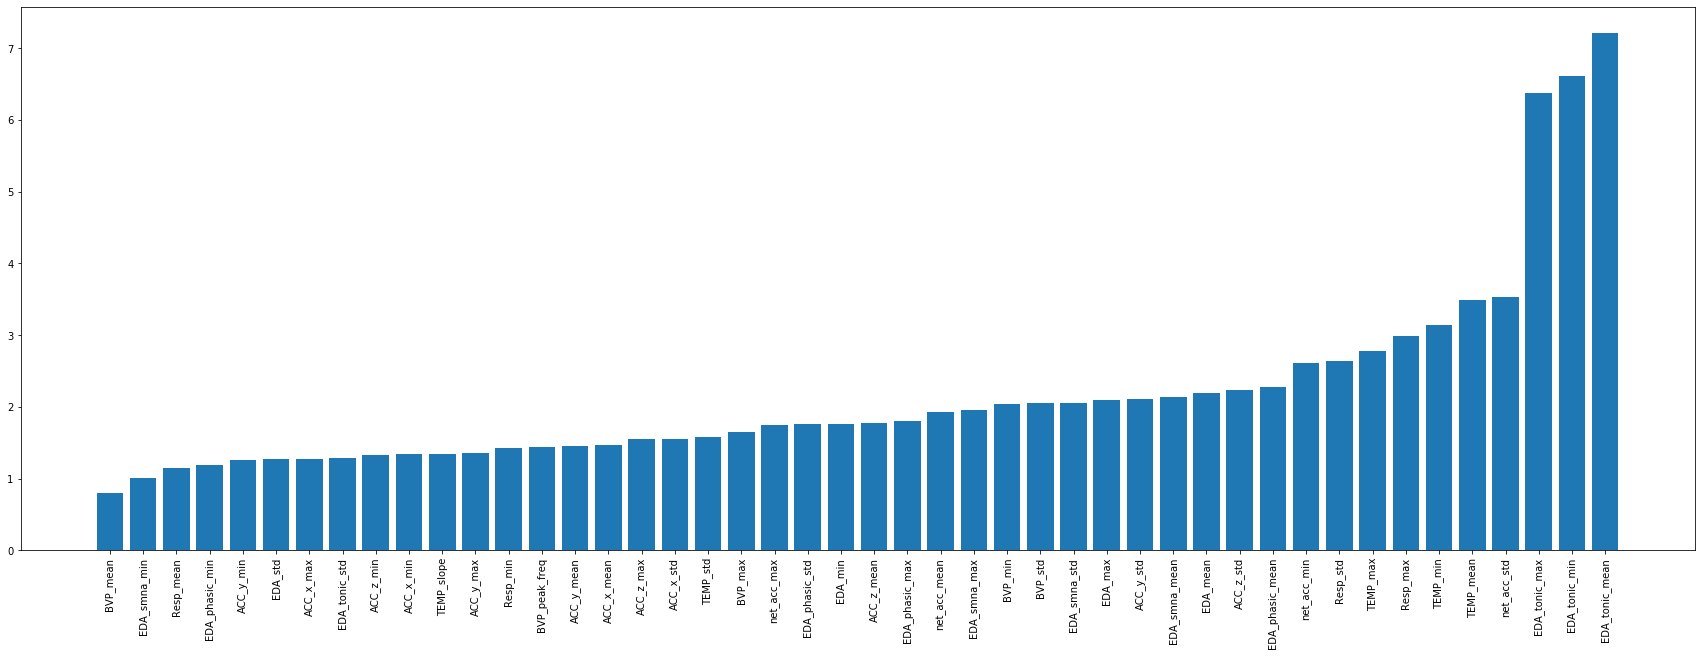

<Figure size 360x1080 with 0 Axes>

In [43]:
names = []
values = []
for i in d:
    names.append(i[0])
    values.append(i[1])
plt.bar(names, values)
plt.xticks(rotation=90)
plt.figure(figsize=(5,15))
fig_size = plt.rcParams["figure.figsize"]
print ("Current size:", fig_size)
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size